In [29]:
import glob
from PIL import Image

import imgaug.augmentables as ia

import numpy as np
import srsly

In [2]:
images = glob.glob('DocVQA/train/documents/*.png')

In [7]:
annotations = glob.glob('DocVQA/train/ocr_results/*.json')

In [13]:
image_filepath = images[500]
annotations_filepath = image_filepath.replace('documents', 'ocr_results').replace('.png', '.json')

In [14]:
annotations = srsly.read_json(annotations_filepath)
image = Image.open(image_filepath).convert('RGB')

In [21]:
def get_image(image_path):
    pil_image = Image.open(image_path).convert('RGB')
    np_image = np.array(pil_image)
    return np_image

In [27]:
def get_bboxes(annotations_path, shape):
    annotations = srsly.read_json(annotations_path)
    annotations = annotations['recognitionResults']
    assert len(annotations) == 1
    
    lines = annotations[0]['lines']
    boxes = []
    for row in lines:
        x0, y0, _, _, x2, y2, _, _ = row['boundingBox']
        boxes.append(ia.BoundingBox(x0, y0, x2, y2))
    boxes_on_image = ia.BoundingBoxesOnImage(boxes, shape=shape)
    return boxes_on_image

In [30]:
np_image = get_image(image_filepath)
bboxes = get_bboxes(annotations_filepath, np_image.shape)

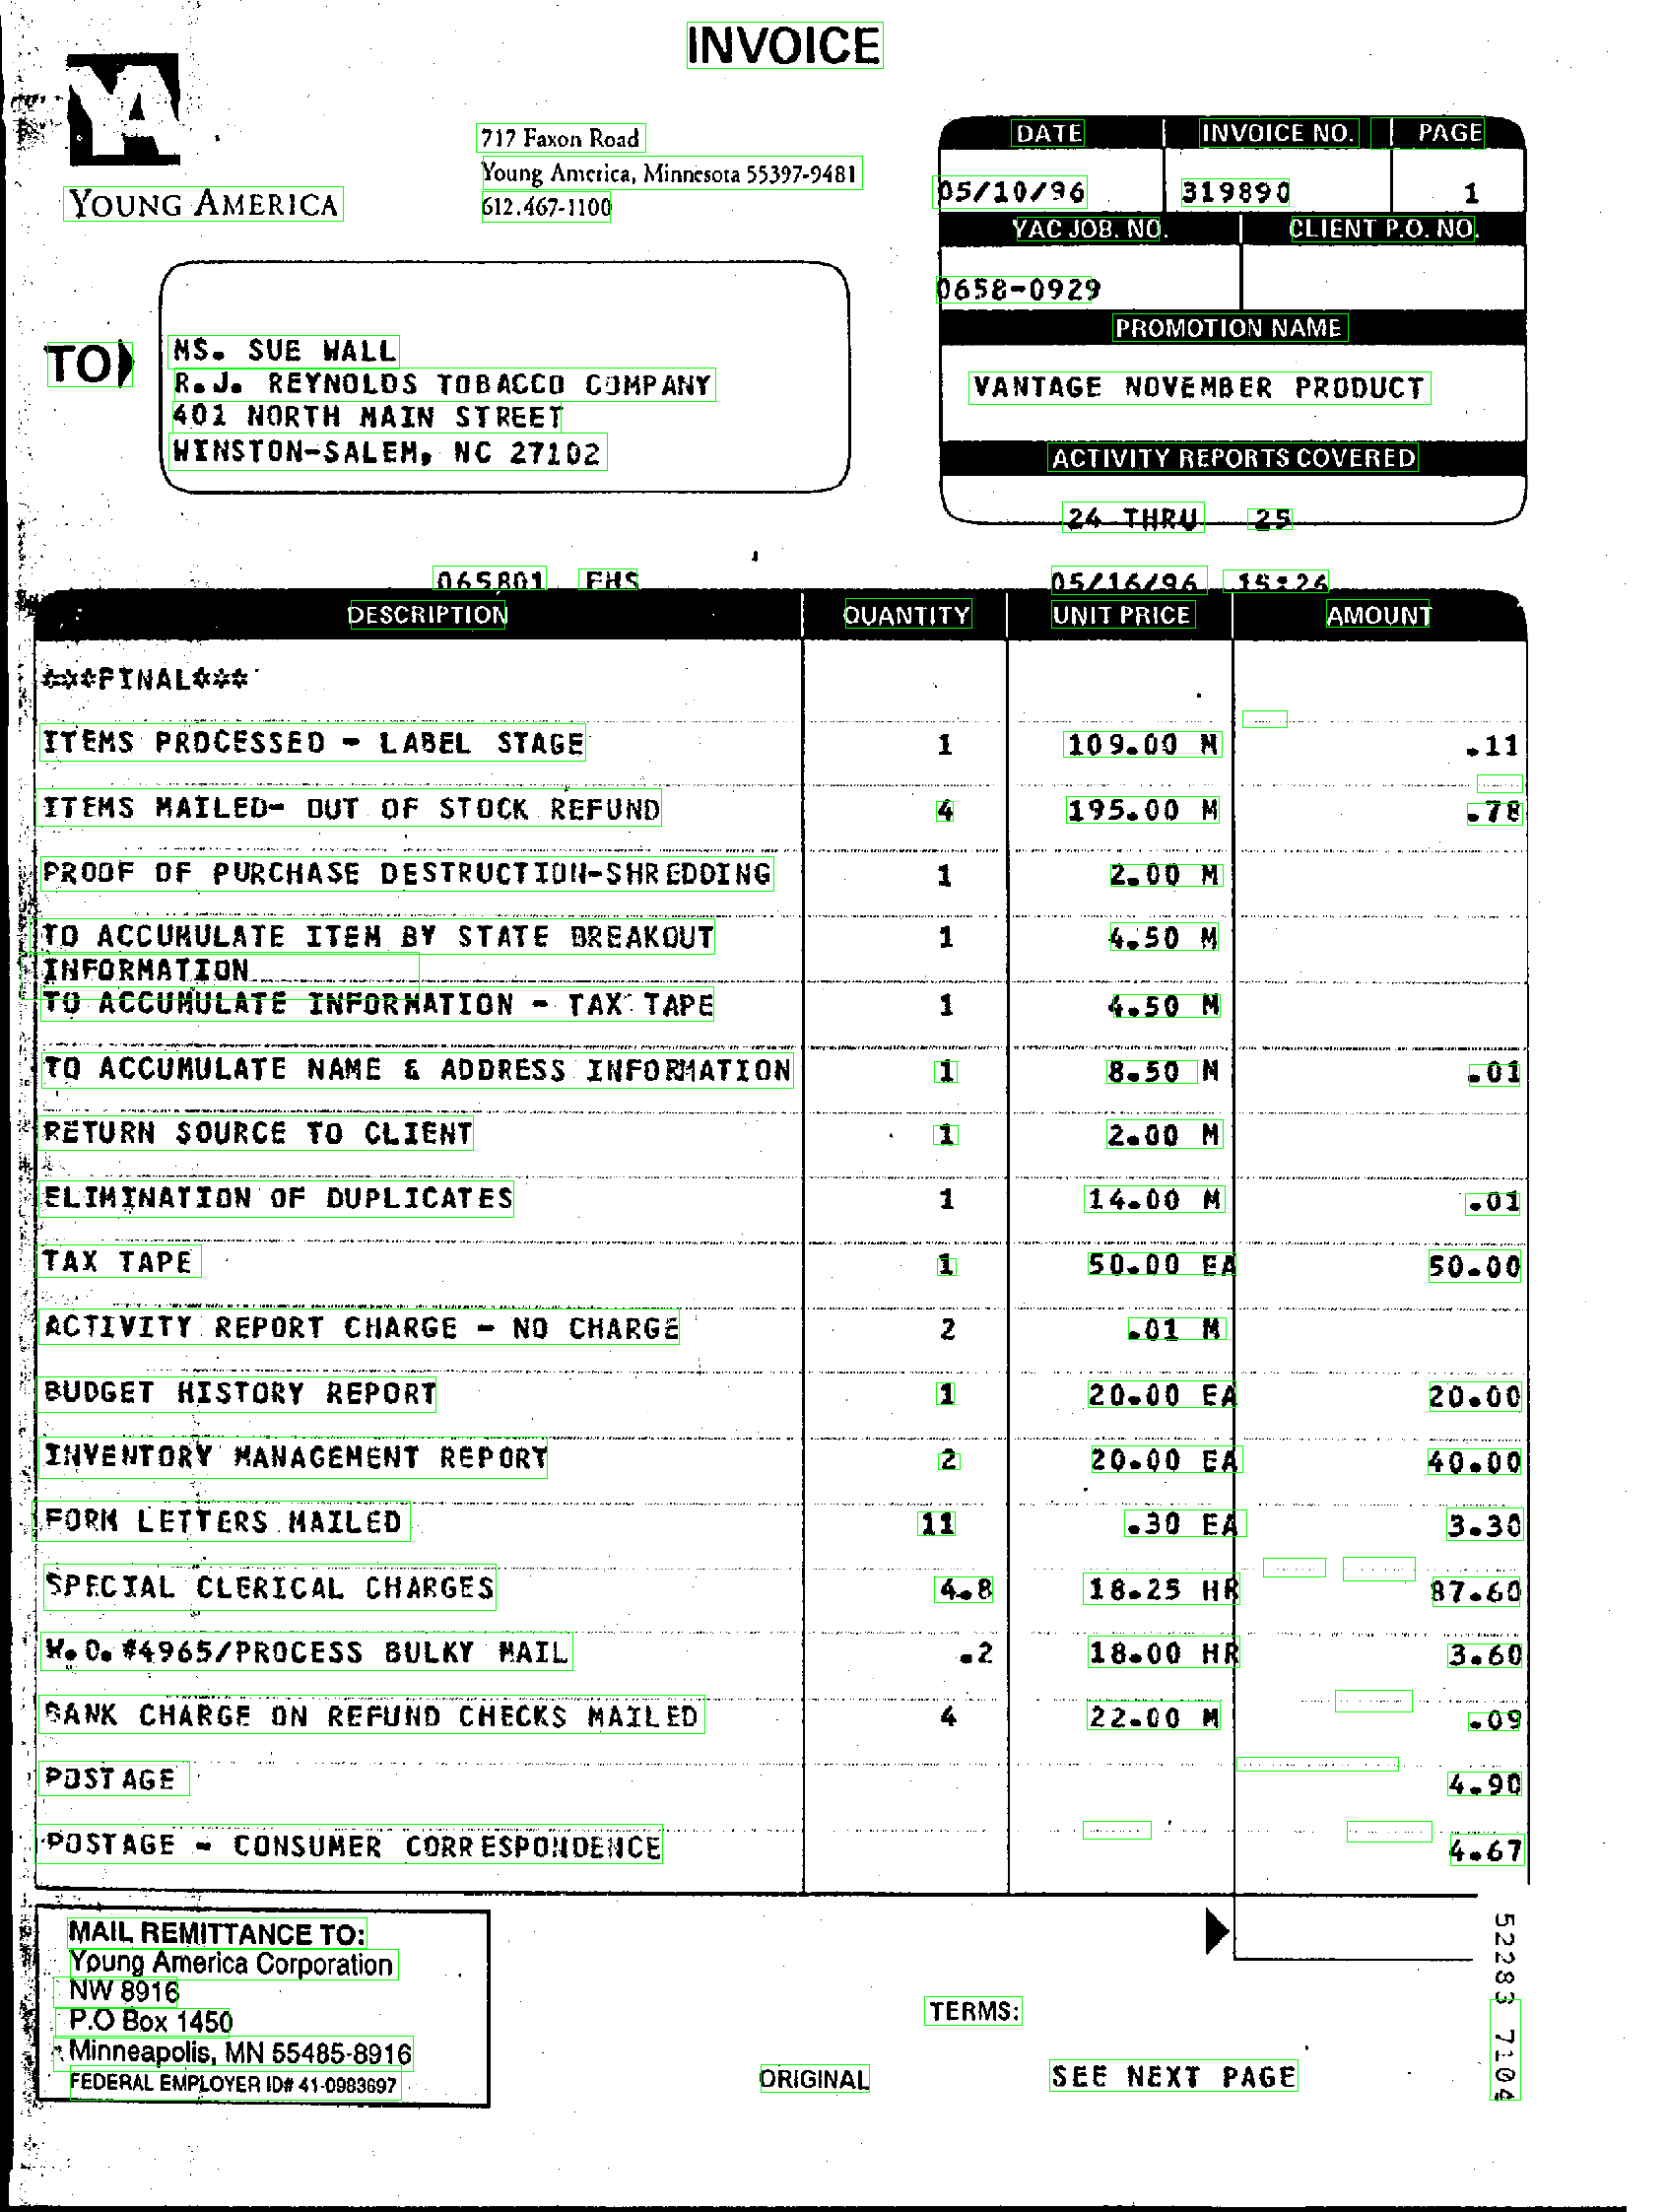

In [31]:
image_drawn = bboxes.draw_on_image(np_image)
Image.fromarray(image_drawn)